DataFrame carregado com sucesso

Limpeza e normalização básicas concluídas.

2. Análise Exploratória: Gênero vs. Nível de Triagem


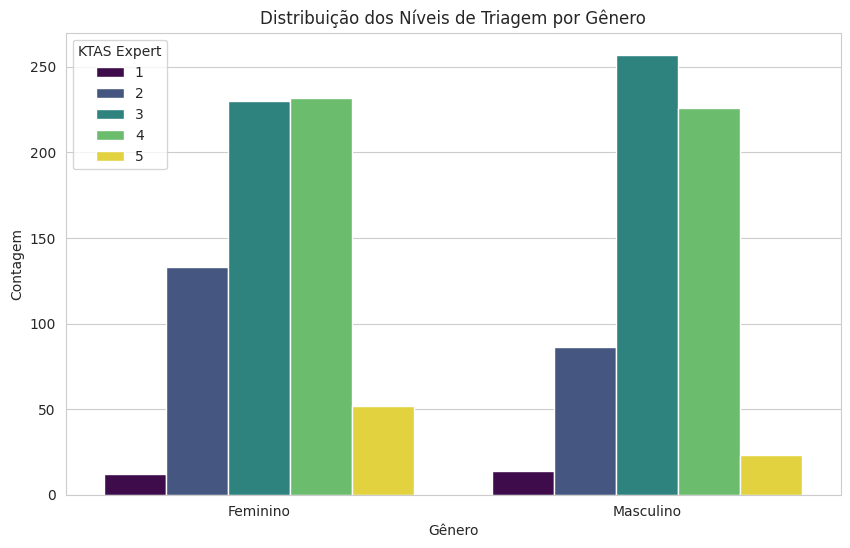


3. Análise Exploratória: Idade vs. Nível de Triagem


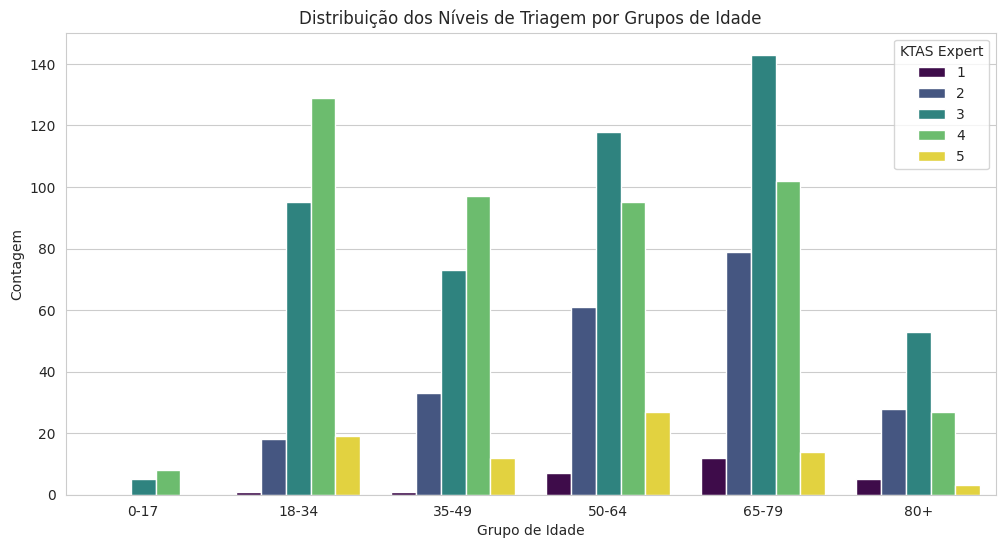

/tmp/ipython-input-770039269.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado_triagem, x='KTAS_expert', y='Age', palette='viridis')


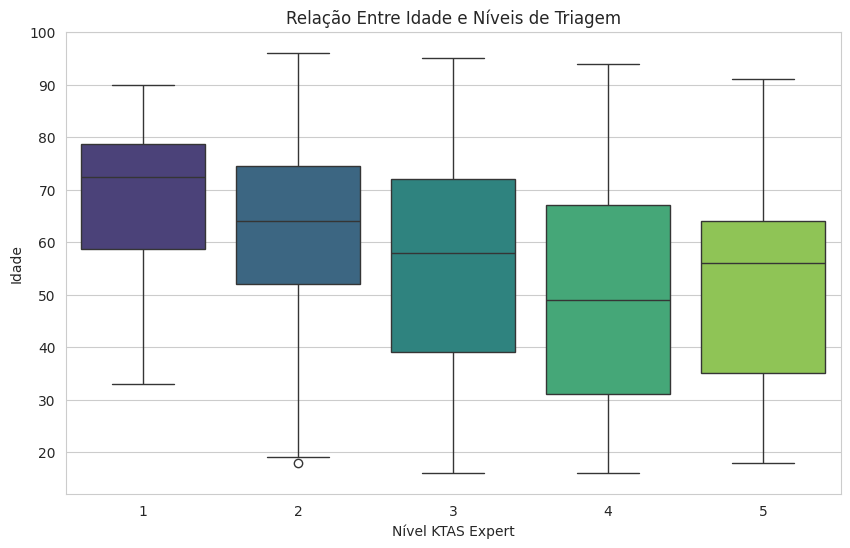


4. Análise Exploratória: Diagnóstico vs. Nível de Triagem


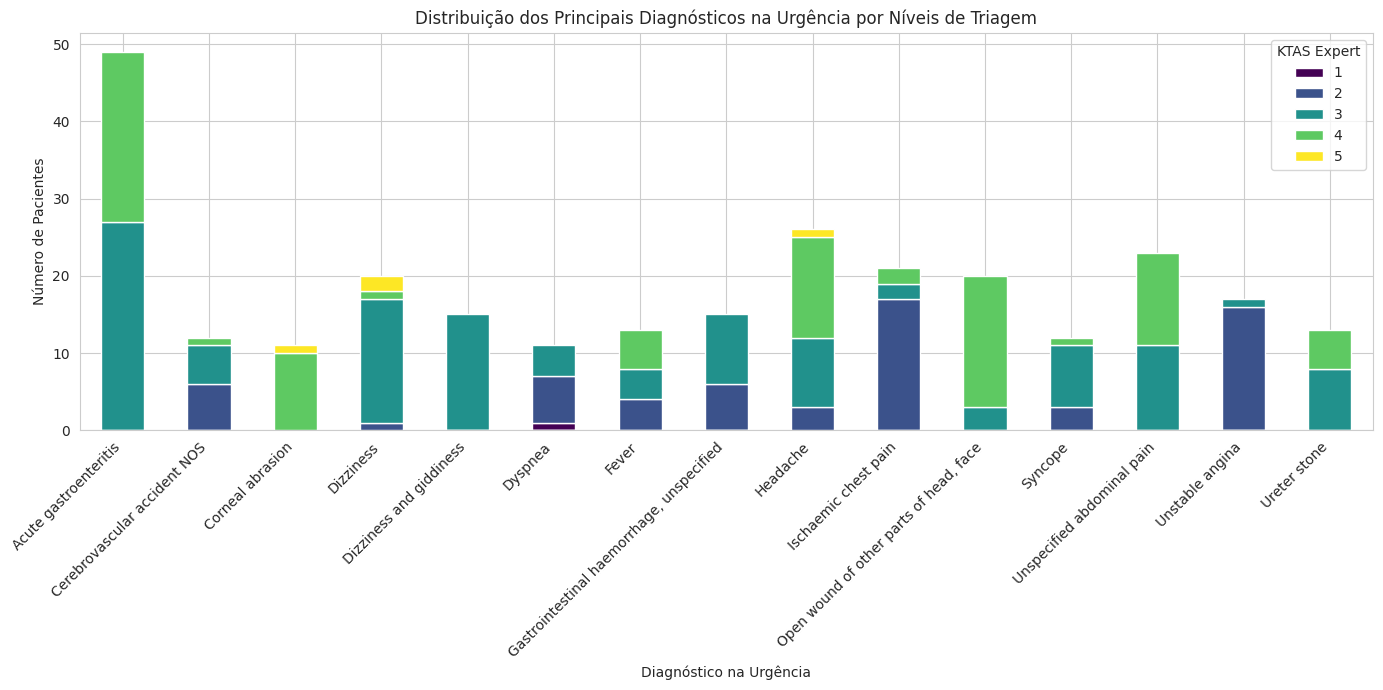


5. Análise Exploratória: Sintoma/Queixa Principal vs. Nível de Triagem


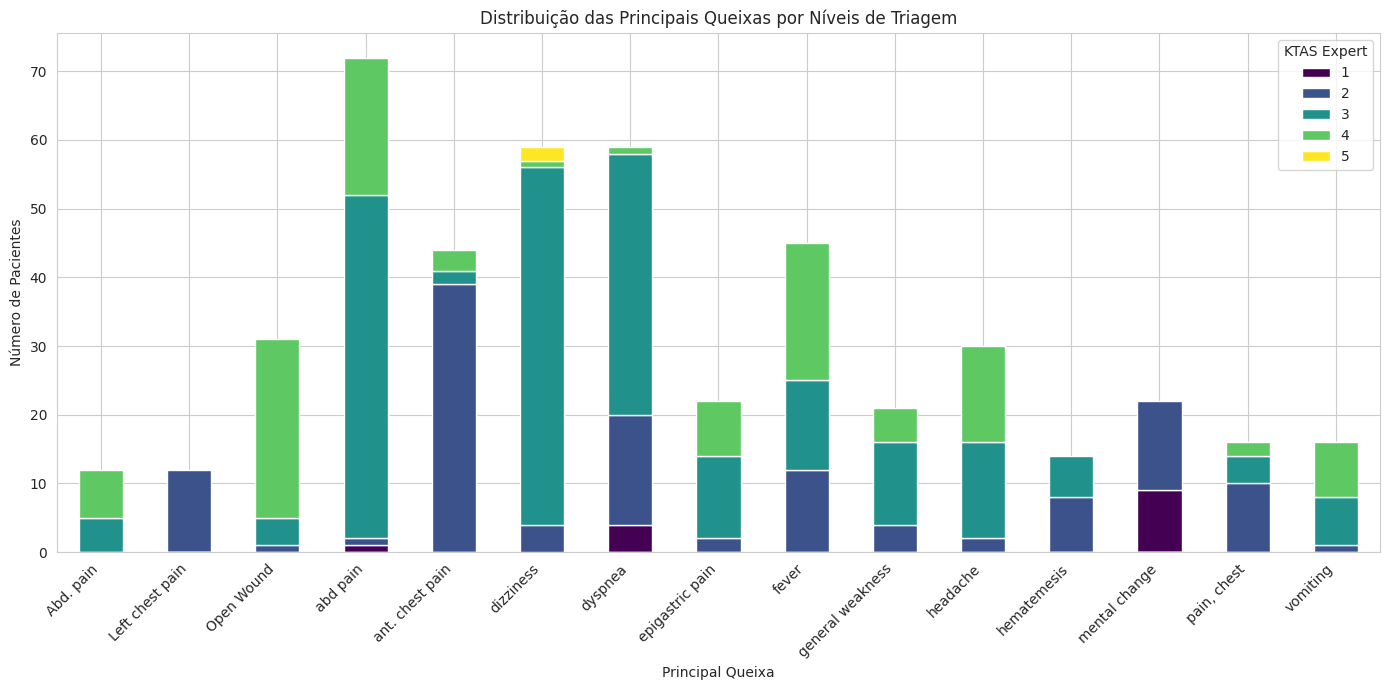


6. Análise Exploratória: Nível de Dor (NRS_pain) vs. Nível de Triagem


/tmp/ipython-input-770039269.py:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dores, x='KTAS_expert', y='NRS_pain', palette='viridis')


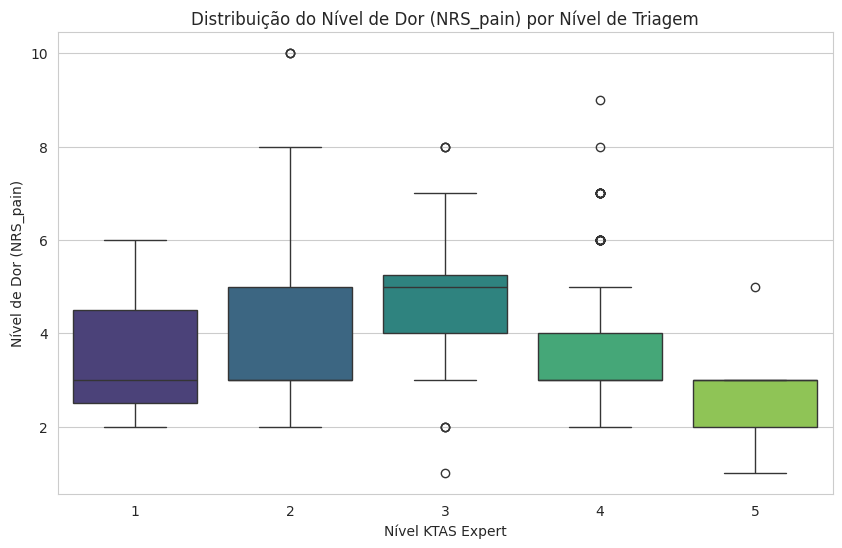


 Análise exploratória concluída.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# NOME: PEDRO MASTANDREA
# RA: 10389910

# 1. Carregar e Limpar os Dados
try:
    # Tentando ler com ponto e vírgula como separador
    df = pd.read_csv('/content/data.csv', encoding='latin1', sep=';')
    print("DataFrame carregado com sucesso")

except FileNotFoundError:
    print("csv não encontrado")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")

# verificando se o Df foi carregado antes de continuar
if 'df' in locals():
    # Remover linhas com valores ausentes na coluna 'Diagnosis in ED'
    df.dropna(subset=['Diagnosis in ED'], inplace=True)

    # Removendo 'Saturation' por ter muitos valores ausentes
    if 'Saturation' in df.columns:
      df.drop('Saturation', axis=1, inplace=True)


    # converter colunas numericas, tratando erros e separador decimal
    colunas_numericas = ['NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'KTAS duration_min', 'Age', 'KTAS_expert']
    for col in colunas_numericas:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

    # Limitar outliers na coluna 'Length of stay_min' (em 95%)
    if 'Length of stay_min' in df.columns:
      limite = df['Length of stay_min'].quantile(0.95)
      df['Length of stay_min'] = df['Length of stay_min'].clip(upper=limite)

    print("\nLimpeza e normalização básicas concluídas.")

    # Filtrar dados onde KTAS_expert não é nulo para anlises de triagem
    df_filtrado_triagem = df.dropna(subset=['KTAS_expert']).copy()

    # 2. Análise Exploratória: Gênero vs Nível de Triagem
    if 'Sex' in df_filtrado_triagem.columns and 'KTAS_expert' in df_filtrado_triagem.columns:
        print("\n2. Análise Exploratória: Gênero vs. Nível de Triagem")
        mapear_genero = {1: 'Masculino', 2: 'Feminino'}
        df_filtrado_triagem['Sex_Label'] = df_filtrado_triagem['Sex'].map(mapear_genero)

        # Grafico de barras agrupado para níveis de triagem por gênero
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_filtrado_triagem, x='Sex_Label', hue='KTAS_expert', palette='viridis')
        plt.title('Distribuição dos Níveis de Triagem por Gênero')
        plt.xlabel('Gênero')
        plt.ylabel('Contagem')
        plt.legend(title='KTAS Expert')
        plt.show()
    else:
        print("\nColunas 'Sex' ou 'KTAS_expert' não encontradas para a análise de Gênero vs Nível de Triagem.")


    # 3. Análise Exploratória: Idade vs Nível de Triagem
    if 'Age' in df_filtrado_triagem.columns and 'KTAS_expert' in df_filtrado_triagem.columns:
        print("\n3. Análise Exploratória: Idade vs. Nível de Triagem")
        # Criar bins de idade
        faixa_de_idades = [0, 18, 35, 50, 65, 80, np.inf]
        label_das_idades = ['0-17', '18-34', '35-49', '50-64', '65-79', '80+']
        df_filtrado_triagem['Age_Group'] = pd.cut(df_filtrado_triagem['Age'], bins=faixa_de_idades, labels=label_das_idades, right=False)

        # Gráfico de barras agrupado para niveis de triagem por grupos de idade
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df_filtrado_triagem, x='Age_Group', hue='KTAS_expert', palette='viridis')
        plt.title('Distribuição dos Níveis de Triagem por Grupos de Idade')
        plt.xlabel('Grupo de Idade')
        plt.ylabel('Contagem')
        plt.legend(title='KTAS Expert')
        plt.show()

        # plotar a relação entre idade e níveis de triagem
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_filtrado_triagem, x='KTAS_expert', y='Age', palette='viridis')
        plt.title('Relação Entre Idade e Níveis de Triagem')
        plt.xlabel('Nível KTAS Expert')
        plt.ylabel('Idade')
        plt.show()
    else:
        print("\nColunas 'Age' ou 'KTAS_expert' não encontradas para a análise de Idade vs. Nível de Triagem.")


    # 4. Analise Exploratória: Diagnóstico vs Nível de Triagem
    if 'Diagnosis in ED' in df_filtrado_triagem.columns and 'KTAS_expert' in df_filtrado_triagem.columns:
        print("\n4. Análise Exploratória: Diagnóstico vs. Nível de Triagem")
        # bter os N principais diagnósticos por nível de triagem
        num_top_diagnosticos = 10
        diagnostico_triagem_con = df_filtrado_triagem.groupby('KTAS_expert')['Diagnosis in ED'].value_counts().groupby(level=0).head(num_top_diagnosticos)

        # visualizar a relação para os principais diagnósticos
        top_diagnosticos_gerais = df_filtrado_triagem['Diagnosis in ED'].value_counts().head(15).index.tolist()
        df_top_diagnosticos = df_filtrado_triagem[df_filtrado_triagem['Diagnosis in ED'].isin(top_diagnosticos_gerais)].copy()
        if not df_top_diagnosticos.empty:
            cross_tab_diagnoses = pd.crosstab(df_top_diagnosticos['Diagnosis in ED'], df_top_diagnosticos['KTAS_expert'])

            cross_tab_diagnoses.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
            plt.title('Distribuição dos Principais Diagnósticos na Urgência por Níveis de Triagem')
            plt.xlabel('Diagnóstico na Urgência')
            plt.ylabel('Número de Pacientes')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title='KTAS Expert')
            plt.tight_layout()
            plt.show()
        else:
             print("\nNão há dados suficientes com os principais diagnósticos para plotar a relação.")
    else:
        print("\nColunas 'Diagnosis in ED' ou 'KTAS_expert' não encontradas para a análise de Diagnóstico vs. Nível de Triagem.")

    # 5. Analise Exploratória: Sintoma (Queixa Principal) vs Nível de Triagem
    if 'Chief_complain' in df_filtrado_triagem.columns and 'KTAS_expert' in df_filtrado_triagem.columns:
        print("\n5. Análise Exploratória: Sintoma/Queixa Principal vs. Nível de Triagem")
        # Obter os N principais queixas por nível de triagem
        num_top_sintomas = 10
        sintoma_triagem_qtde = df_filtrado_triagem.groupby('KTAS_expert')['Chief_complain'].value_counts().groupby(level=0).head(num_top_sintomas)

        # obter as contagens das principais queixas em todos os níveis de triagem para selecionar um número gerenciável para plotagem
        top_queixas_gerais = df_filtrado_triagem['Chief_complain'].value_counts().head(15).index.tolist()

        # Filtrar o dataframe para incluir apenas as principais queixas gerais
        df_top_queixas = df_filtrado_triagem[df_filtrado_triagem['Chief_complain'].isin(top_queixas_gerais)].copy() # Usar .copy() para evitar SettingWithCopyWarning
        if not df_top_queixas.empty:
            # Tabulação cruzada de Chief_complain x KTAS_expert
            tabela_cruzada_sintom = pd.crosstab(df_top_queixas['Chief_complain'], df_top_queixas['KTAS_expert'])

            # plote de um gráfico de barras empilhadas
            tabela_cruzada_sintom.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
            plt.title('Distribuição das Principais Queixas por Níveis de Triagem')
            plt.xlabel('Principal Queixa')
            plt.ylabel('Número de Pacientes')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title='KTAS Expert')
            plt.tight_layout()
            plt.show()
        else:
            print("\n Não há dados suficientes com as principais queixas para plotar a relação com Nível de Triagem.")
    else:
        print("\n Colunas 'Chief_complain' ou 'KTAS_expert' não encontradas para a análise de Sintoma/Queixa Principal vs. Nível de Triagem.")


    # 6. Analise Exploratória: Nível de Dor (NRS_pain) vs Nível de Triagem
    if 'NRS_pain' in df_filtrado_triagem.columns and 'KTAS_expert' in df_filtrado_triagem.columns:
        print("\n6. Análise Exploratória: Nível de Dor (NRS_pain) vs. Nível de Triagem")
        # Remover valores nulos na coluna NRS_pain
        df_dores = df_filtrado_triagem.dropna(subset=['NRS_pain']).copy()
        if not df_dores.empty:
          # Tabela visual da média do NRS_pain por nível de triagem
          pain_triage_mean = df_dores.groupby('KTAS_expert')['NRS_pain'].mean()

          # plotar para mostrar a distribuição do NRS_pain por nível de triagem
          plt.figure(figsize=(10, 6))
          sns.boxplot(data=df_dores, x='KTAS_expert', y='NRS_pain', palette='viridis')
          plt.title('Distribuição do Nível de Dor (NRS_pain) por Nível de Triagem')
          plt.xlabel('Nível KTAS Expert')
          plt.ylabel('Nível de Dor (NRS_pain)')
          plt.show()
        else:
          print("\n Não há dados suficientes na coluna 'NRS_pain' para esta análise.")

    else:
        print("\n As colunas 'NRS_pain' ou 'KTAS_expert' não encontradas para a análise de Nível de Dor vs Nível de Triagem.")

else:
    print("\n Não foi possível carregar o DataFrame. Analises não realizadas.")

print("\n Análise exploratória concluída.")

In [79]:
# Preparação dos dados

# Atributos relevantes para entrada de dados

atributos = df[['Chief_complain', 'Age', 'Sex', 'NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT']].copy()

# Atributos relevantes alvo (saída)
# Queremos prever a doença (Diagnosis in ED) e a classificação da triagem (KTAS_expert)
alvos = df[['Diagnosis in ED', 'KTAS_expert']].copy()

# O modelo de árvore de decisão geralmente lida melhor com dados numéricos.
# As colunas 'Chief_complain' e 'Diagnosis in ED' são categoricos (e textuais portanto)

print("Atributos selecionados para atributos:")
display(atributos.head())

print("\nAtributos selecionados para alvos:")
display(alvos.head())

# Preparar os dados transformando variáveis categóricas em numéricas usando One-Hot Encoding

# Identificandi colunas categóricas para atributos
atributos_categorico = ['Chief_complain']
# Adicionar 'Signs and symptoms' se existir no DataFrame original
if 'Signs and symptoms' in df.columns:
    atributos_categorico.append('Signs and symptoms')

# Aplicar One-Hot Encoding nas atributos categóricas
atributos = pd.get_dummies(atributos, columns=atributos_categorico, dummy_na=False)

# Para o target 'Diagnosis in ED', também aplicamos One-Hot Encoding pois queremos prever uma entre várias classes de diagnóstico.
if 'Diagnosis in ED' in alvos.columns:
    alvos = pd.get_dummies(alvos, columns=['Diagnosis in ED'], dummy_na=False)

print("\natributos após One-Hot Encoding:")
display(atributos.head())
print(f"\nShape das atributos após One-Hot Encoding: {atributos.shape}")

print("\nalvos após One-Hot Encoding:")
display(alvos.head())
print(f"\nShape dos alvos após One-Hot Encoding: {alvos.shape}")

Atributos selecionados para atributos:


,Chief_complain,Age,Sex,NRS_pain,SBP,DBP,HR,RR,BT
0,right ocular pain,71,2,2.0,160.0,100.0,84.0,18.0,36.6
1,right forearm burn,56,1,2.0,137.0,75.0,60.0,20.0,36.5
2,"arm pain, Lt",68,1,2.0,130.0,80.0,102.0,20.0,36.6
3,ascites tapping,71,2,3.0,139.0,94.0,88.0,20.0,36.5
4,"distension, abd",58,2,3.0,91.0,67.0,93.0,18.0,36.5



Atributos selecionados para alvos:


,Diagnosis in ED,KTAS_expert
0,Corneal abrasion,4
1,"Burn of hand, firts degree dorsum",5
2,"Fracture of surgical neck of humerus, closed",5
3,Alcoholic liver cirrhosis with ascites,5
4,Ascites,5



atributos após One-Hot Encoding:


,Age,Sex,NRS_pain,SBP,DBP,HR,RR,BT,Chief_complain_??,Chief_complain_?? ??,...,Chief_complain_vaginal spotting,Chief_complain_visual disturbance,Chief_complain_voiding difficulty,Chief_complain_vomiting,Chief_complain_watery diarrhea,Chief_complain_weakness,Chief_complain_whirling type vertigo,Chief_complain_wrist laceration,"Chief_complain_wrist pain, Lt","Chief_complain_wrist pain, Rt"
0,71,2,2.0,160.0,100.0,84.0,18.0,36.6,False,False,...,False,False,False,False,False,False,False,False,False,False
1,56,1,2.0,137.0,75.0,60.0,20.0,36.5,False,False,...,False,False,False,False,False,False,False,False,False,False
2,68,1,2.0,130.0,80.0,102.0,20.0,36.6,False,False,...,False,False,False,False,False,False,False,False,False,False
3,71,2,3.0,139.0,94.0,88.0,20.0,36.5,False,False,...,False,False,False,False,False,False,False,False,False,False
4,58,2,3.0,91.0,67.0,93.0,18.0,36.5,False,False,...,False,False,False,False,False,False,False,False,False,False



Shape das atributos após One-Hot Encoding: (1265, 425)

alvos após One-Hot Encoding:


,KTAS_expert,Diagnosis in ED_(Seizure) Convulsive NOS,"Diagnosis in ED_Abdomen pain, generalized","Diagnosis in ED_Abdomen pain, right upper quadrant","Diagnosis in ED_Abdominal aortic aneurysm, ruptured",Diagnosis in ED_Abdominal pain,Diagnosis in ED_Abnormal finding on abdominal and retroperitoneal imaging,Diagnosis in ED_Abnormal involuntary movement,"Diagnosis in ED_Abnormal uterine and vaginal bleeding, unspecified",Diagnosis in ED_Abscess of abdominopelvic,...,Diagnosis in ED_Ventricular tachycardia,"Diagnosis in ED_Vertebra compression fracture, NOS, Lumbar region",Diagnosis in ED_Vestibular neuritis,Diagnosis in ED_Vestibular neuronitis,Diagnosis in ED_Viral infection,"Diagnosis in ED_Viral infection, unspecified",Diagnosis in ED_Vomiting,Diagnosis in ED_Whiplash injury,Diagnosis in ED_drug eruption,Diagnosis in ED_fever of unknown origin
0,4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Shape dos alvos após One-Hot Encoding: (1265, 584)
